In [13]:
from google.colab import drive
drive.mount('/content/drive')
!pip install ipynb
import sys  
sys.path.insert(0,'/content/drive/MyDrive/CNN-deterministic-decoupling')
path = '/content/drive/MyDrive/CNN-deterministic-decoupling'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import torch
from torchvision import models
from ipynb.fs.defs.imageFunctions import show_image,prepare_image
from PIL import Image

Cargamos modelo pre entrenado

In [15]:
model = models.vgg16(pretrained=True)
model_without_norm = torch.nn.Sequential()
for name, module in model.named_children():
    module.requires_grad = False
    if not isinstance(module, (torch.nn.BatchNorm1d, torch.nn.BatchNorm2d, torch.nn.BatchNorm3d)):
        model_without_norm.add_module(name, module)

Le quitamos las capas de normalización y le pedimos que no aprenda <br>
No esoty seguro de que sea necesario aqui pero en algun momento me vendrá bien)

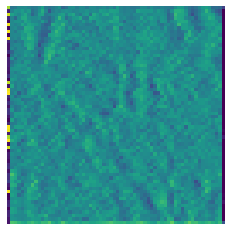

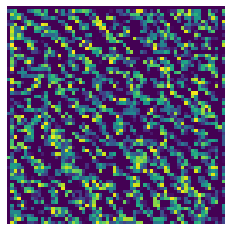

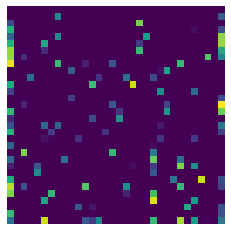

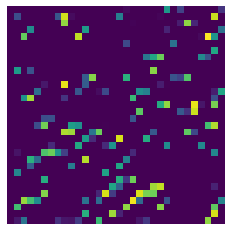

384
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:

random = prepare_image(Image.open(path+"/imagenes/texture6.jpg").convert("RGB"),size=64)

for param in model_without_norm.parameters():
    param.requires_grad = False

list=[]

layerLimit=4
counter=0

for i,conv_layer in enumerate(model_without_norm.features): 
    


    random = conv_layer(random)

    #La imagen ahora tiene 4 dimensiones que representan lo siguiente [Batch, Channels, Height, Width]
    #Como queremos ver el resultado de cada filtro/canal iteramos sobre la segunda dimension 
    #Nos guardamos los valores de las 2 ultimas dimensiones
    
    if isinstance(conv_layer, torch.nn.modules.activation.ReLU):

        counter+=1
        if counter > layerLimit:
          break
        # loop over the output of each filter
        for j in range(random.shape[1]):
            
            #Estos da [Batch, Height, Width] para el canal j
            filter_output = random[:, j, :, :]
            #Nos quedamos solo con lo que nos interesa [Height, Width]
            filter_output = filter_output.squeeze(0)
            list.append(1)
            if j==0:
              show_image(filter_output)  

        
       

print(len(list))
print(list)
